INF8770 Technologies multimédias

Polytechnique Montréal

Exemple d'image DC

In [1]:
import numpy as np
from scipy.fftpack import dct
from skimage import io
import matplotlib.pyplot as plt

Lecture de l'image et conversion en tons de gris. On pourrait faire les calculs pour chaque canal de couleur séparé.

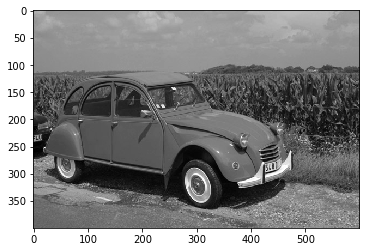

In [2]:
img = io.imread('RGB.jpg', as_gray=True)*255
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.show()

Calcul de la DCT sur des blocs 8 par 8. Puisque la DCT est séparable, on l'applique en X et ensuite en Y.

In [3]:
imageDC = np.zeros((int(len(img)/8),int(len(img[0])/8)))
for i in range(0,len(img),8):
    for j in range(0,len(img[0]),8):
        tmp = img[i:i+8,j:j+8]
        tmp = tmp - 128
        resdct = dct(dct(tmp, axis=0, norm='ortho'), axis=1, norm='ortho')
        # On extrait le coefficent DC et on l'ajoute dans une matrice image. 
        imageDC[int(i/8),int(j/8)] = resdct[0,0]/8 + 128

Affichage de l'image DC

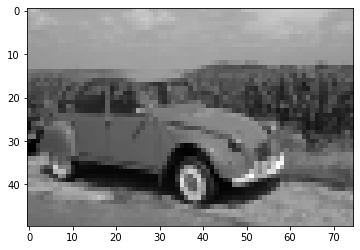

In [4]:
plt.imshow(imageDC,cmap = plt.get_cmap('gray'))
plt.show()